In [1]:
import os, sys
import xarray as xr
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from evve.orographic import orographic

# EVVE Orographic Updraft Example

This example demonstrates the use of the model. It uses repository-provided sample elevation map of two different regions of the US. For details of the EVVE orographic model, see Thedin et al. (2024).

This example follows closely data presented on the paper Thedin et al. (2024). 

 - Thedin, R, Brandes, D, Quon, E, Sandhu, R, Tripp, C. _"A three-dimensional model of terrain-induced updrafts for movement ecology studies"_. Journal of Movement Ecology, v. 12, 25, 2024. https://doi.org/10.1186/s40462-024-00457-x

In [2]:
# Values at the two regions, given as examples. Same values used in the article, which comes from NREL's WIND ToolKit.
# Note that the wind speeds at 160 m are not needed for the EVVE model, and are given for comparison purposes with the BO04 model.
# The wind speeds at 30 m AGL are left commented out if users desire to use it to reproduce plots from the paper.

#pa_n8_wspdAt30  = 7.64
pa_n8_wspdAt80  = 8.95
pa_n8_wspdAt160 = 9.96

#wy_n8_wspdAt30  = 6.37
wy_n8_wspdAt80  = 7.85
wy_n8_wspdAt160 = 8.86

In [3]:
# The elevation should be given in xarray.Dataset format with coordinates x and y.
ds_WY= xr.open_dataset('ds_WY.nc')
ds_PA= xr.open_dataset('ds_PA.nc')

In [4]:
# Conditions of interest. Here we are only picking one height for illustration purposes
wdir = 270
h = 160

## EVVE model

If the computation of some of the adjusting factors is too slow, consider downsampling your terrain data before using EVVE. Since EVVE performs smoothing on the data, there will be no significant loss of details.

In [5]:
# Initialize the objects
WY_evve = orographic(ds_WY)
PA_evve = orographic(ds_PA)

In [6]:
# For the EVVE orographic model, the windspeed at the reference height of 80 m is needed, regardless of the desired height
wspdAtRef_wy = wy_n8_wspdAt80
wspdAtRef_pa = pa_n8_wspdAt80

In [7]:
# Compute the orographic updraft using the EVVE model for the Wyoming region
WY_evve.calcOrographicUpdraft(wdir, h, wspdAtRef=wspdAtRef_wy, model='evve')

Computing the orographic updraft using EVVE model
  Computing height adjustment factor from the EVVE model (1/3)..
  Computing Sx adjustment factor from the EVVE model (2/3)..
  Computing terrain complexity adjustment factor from the EVVE model (3/3)..
Done.


In [8]:
# Compute the orographic updraft using the EVVE model for the Pennsylvania region
PA_evve.calcOrographicUpdraft(wdir, h, wspdAtRef=wspdAtRef_pa, model='evve')

Computing the orographic updraft using EVVE model
  Computing height adjustment factor from the EVVE model (1/3)..
  Computing Sx adjustment factor from the EVVE model (2/3)..
  Computing terrain complexity adjustment factor from the EVVE model (3/3)..
Done.


## Original BO04 model 

In [9]:
# Initialize the objects
WY_bo04 = orographic(ds_WY)
PA_bo04 = orographic(ds_PA)

In [10]:
# Since the requested height is 30 m, for the BO04 model, the wind speed at such height is needed.
wspdAtHeightH_wy = wy_n8_wspdAt160
wspdAtHeightH_pa = pa_n8_wspdAt160

In [11]:
# Compute the orographic updraft using the BO04 model for the Wyoming region
WY_bo04.calcOrographicUpdraft(wdir, h, wspdAtHeightH=wspdAtHeightH_wy, model='bo04')

Computing the orographic updraft using BO04 model
Done.


In [12]:
# Compute the orographic updraft using the BO04 model for the Wyoming region
PA_bo04.calcOrographicUpdraft(wdir, h, wspdAtHeightH=wspdAtHeightH_pa, model='bo04')

Computing the orographic updraft using BO04 model
Done.


# Plots

## Terrain properties

The terrain quantities using the EVVE model contain the smoother fields (as per Eq. (6) of the paper). Because of that, we will show the terrain properties using the BO04 model's object.

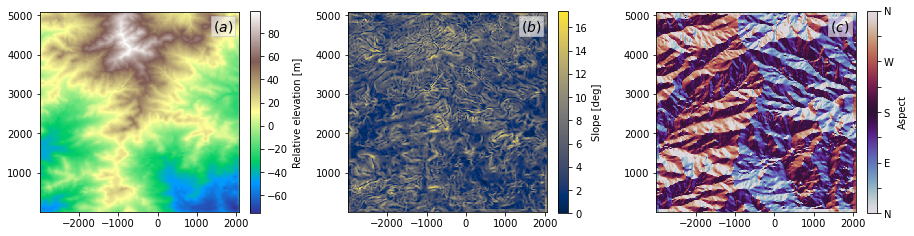

In [13]:
WY_bo04.plotTerrain()

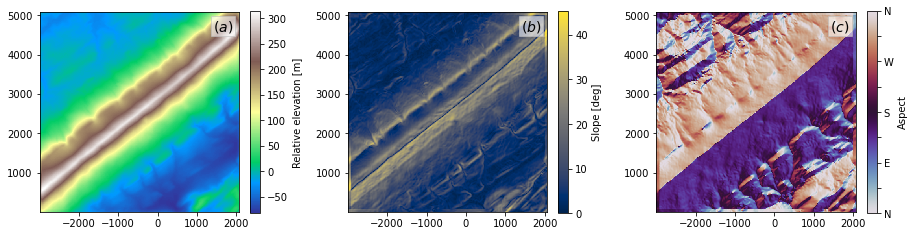

In [14]:
PA_bo04.plotTerrain()

## Orographic updrafts computed by the EVVE model 

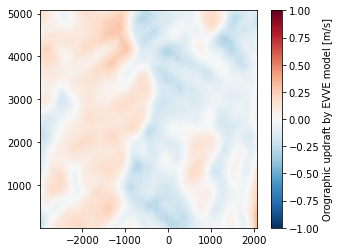

In [15]:
WY_evve.plotOrographicUpdraft(cmap='RdBu_r', vmin=-1, vmax=1)

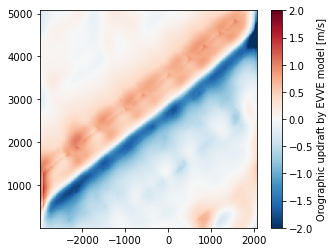

In [16]:
PA_evve.plotOrographicUpdraft(cmap='RdBu_r', vmin=-2, vmax=2)

## Reproduction of part of Fig. 10 from Thedin et al. (2024)

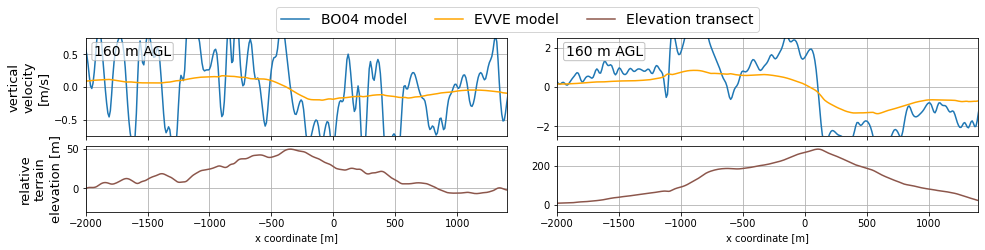

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(16,3.2), gridspec_kw={'wspace':0.12,'hspace':0.12,'height_ratios':[3,2]})

y_xsec = 3000

# --- 30 m AGL WY
axs[0,0].plot(WY_bo04.ds.sel(y=y_xsec)['x'], WY_bo04.ds.sel(y=y_xsec)['w0_bo04'], c='tab:blue', label='BO04 model')
axs[0,0].plot(WY_evve.ds.sel(y=y_xsec)['x'], WY_evve.ds.sel(y=y_xsec)['w0_evve'], c='orange',   label='EVVE model')

# --- elevation transect WY
axs[1,0].plot(WY_evve.ds.sel(y=y_xsec)['x'], WY_evve.ds.sel(y=y_xsec)['z'], color='tab:brown', ls='solid', label='Elevation transect')


# --- 30 m AGL PA
axs[0,1].plot(PA_bo04.ds.sel(y=y_xsec)['x'], PA_bo04.ds.sel(y=y_xsec)['w0_bo04'], c='tab:blue')
axs[0,1].plot(PA_evve.ds.sel(y=y_xsec)['x'], PA_evve.ds.sel(y=y_xsec)['w0_evve'], c='orange')
  
# --- elevation transect PA
axs[1,1].plot(PA_evve.ds.sel(y=y_xsec)['x'], PA_evve.ds.sel(y=y_xsec)['z'], color='tab:brown', ls='solid')

props = dict(facecolor='white', alpha=0.7, edgecolor='darkgray', boxstyle='round', pad=0.15)
axs[0,0].text(0.02, 0.82, f'{WY_evve.h} m AGL',  color='black', transform=axs[0,0].transAxes, fontsize=14, bbox=props)
axs[0,1].text(0.02, 0.82, f'{PA_evve.h} m AGL',  color='black', transform=axs[0,1].transAxes, fontsize=14, bbox=props)

for ax in axs[:-1,0]:
    ax.set_ylim([-2.5, 2.5])
    ax.set_ylim([-0.75, 0.75])
    ax.set_ylabel('vertical\nvelocity\n[m/s]', fontsize=13)
for ax in axs[:-1,1]:
    ax.set_ylim([-2.5, 2.5])

for ax in axs[:,0]:
    ax.set_xlim([min(WY_evve.ds.x)+500, max(WY_evve.ds.x)-500])
for ax in axs[:,1]:
    ax.set_xlim([min(PA_evve.ds.x)+500, max(PA_evve.ds.x)-500])

axs[-1,0].set_xlabel('x coordinate [m]')
axs[-1,1].set_xlabel('x coordinate [m]')
axs[-1,0].set_ylabel('relative\nterrain\nelevation [m]', fontsize=13)

fig.legend(loc='center', bbox_to_anchor=(0.5, 0.96), ncol=4, fontsize=14)

for ax in axs.flatten():
    ax.set_xlim([-2000, 1400])
    ax.grid(which='major')
    ax.tick_params(axis='both', which='major')
    